## Sprint4　機械学習スクラッチ ロジスティック回帰

#### 1.このSprintについて

##### Sprintの目的
スクラッチを通してロジスティック回帰を理解する
分類問題についての基礎を学ぶ ### どのように学ぶか スクラッチでロジスティック回帰を実装した後、学習と検証を行なっていきます。

#### 2.ロジスティック回帰スクラッチ
ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

雛形

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return
＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿

### 【問題1】仮定関数 
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$g(z) = \frac{1}{1 + e^{-z}}$$

線形回帰の仮定関数は次の式でした。

$$h(\theta) = \theta^T \cdot x$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$h\theta(x) = \frac{1}{1 + e^{-\theta^T \cdot x}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from tempfile import TemporaryFile

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, no_bias, verbose, regularization=0.5):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        self.regularization = regularization

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.val_enable = False
        if X_val is not None:
            self.val_enable = True
        
        if not self.no_bias:
            X = np.concatenate([np.ones(X.shape[0]).reshape(-1,1), X], axis=1)
            if self.val_enable:
                X_val = np.concatenate([np.ones(X_val.shape[0]).reshape(-1,1), X_val], axis=1)
        
        n_features = X.shape[1]
        # パラメータ（重み）
        self.coef_ = np.random.rand(n_features)
        
        for i in range(self.iter):
            self._gradient_descent(X, self._logistic_hypothesis(X) - y)
            self.loss[i] = self._cost(y, self._logistic_hypothesis(X))
            if self.val_enable:
                self.val_loss[i] = self._cost(y_val, self._logistic_hypothesis(X_val))
        
        if self.verbose:
            self.learning_curve()
            print()
        pass


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        
        threshold = 0.5
        return (self.predict_proba(X) > threshold).astype(int)

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if not self.no_bias:
            X = np.concatenate([np.ones(X.shape[0]).reshape(-1,1), X], axis=1)
        
        return self._logistic_hypothesis(X)
    
    def _logistic_hypothesis(self, X):
        """
        ロジスティック回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        
        """
        h = X@self.coef_
        g = 1 / (1+np.exp(-h))
        return g
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により学習させる（1回）
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
        returnはない
        
        """
        self.coef_ = self.coef_ - self.lr*(np.average(error*X.T, axis=1) + (self.regularization/X.shape[0])*np.concatenate([np.array([0]), self.coef_[1:]]))
        return
    
    def _cost(self, y_true, y_pred_proba):
        j = np.average(-y_true*np.log(y_pred_proba) -(1-y_true)*np.log(1-y_pred_proba)) + (self.regularization/(2*len(y_true)))*np.sum(self.coef_[1:])
        return j
    
    def learning_curve(self):
        plt.title("model loss")
        plt.xlabel("iter")
        plt.ylabel("loss")
        plt.plot(np.arange(self.iter), self.loss, label="loss")
        if self.val_enable:
            plt.plot(np.arange(self.iter), self.val_loss, label="val_loss")
        plt.legend()
        plt.show()

### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit メソッドから呼び出すようにしてください。$$\theta_j := \theta_j - \alpha\frac{\partial J(\theta)}{\partial\theta_j}$$$$\frac{\partial J(\theta)}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)} - y^{(i)})x^{(i)}_j\right) , j = 0$$$$\frac{\partial J(\theta)}{\partial\theta_j} = \left(\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)} - y^{(i)})x^{(i)}_j\right)\right) + \frac{\lambda}{m}\theta_j , j \geq 1$$

$\alpha$ : 学習率

$i$ : サンプルのインデックス

$j$ : 特徴量のインデックス

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解ラベル

$\theta_j$ : j番目のパラメータ（重み）

$\lambda$ : 正則化パラメータ

【解答】上記ScratchLogisticRegressionクラス内に実装
#### 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 $h_\theta(x)$の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

【解答】上記ScratchLogisticRegressionクラス内に実装
＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿

#### 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

なお、この数式には正則化項が含まれています。

＊数式が見切れる場合、DIVERを全画面にして御覧ください。$$J(\theta) = \frac{1}{m}\sum_{i=1}^m\left[-y^{(i)}\log\left(h_\theta(x^{(i)})\right) - h_\theta(x^{(i)}) \log(1 - h_\theta\left(x{(i)}\right)\right] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解ラベル

$\theta_j$ : j番目のパラメータ（重み）

$n$ : 特徴量の数

$\lambda$ : 正則化パラメータ

【解答】上記ScratchLogisticRegressionクラス内に実装

#### 3.検証
＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿

### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    n_samples = len(X)
    idx = np.zeros(n_samples)
    train_size =  int(n_samples*train_size)
    train_idx = np.random.choice(np.arange(n_samples), train_size, replace=False)
    idx[train_idx] = 1
    
    X_train ,X_test = X[idx==1], X[idx==0]
    y_train ,y_test = y[idx==1], y[idx==0]
    
    return X_train, X_test, y_train, y_test

In [4]:
def evalate(y_true, y_pred):
    print("accuracy =", accuracy_score(y_true, y_pred))
    print("precision =", precision_score(y_true, y_pred, average='macro'))
    print("recall =", recall_score(y_true, y_pred, average='macro'))
    print("f1 =", f1_score(y_true, y_pred, average='macro'))
    print(confusion_matrix(y_true, y_pred))

In [5]:
iris_data = load_iris()
x1, x2 = 2,3
iris_X = iris_data.data[iris_data.target!=0][:,[x1,x2]]
iris_y = iris_data.target[iris_data.target!=0] - 1
iris_target_names = iris_data.target_names[1:]
iris_feature_names = iris_data.feature_names[x1],iris_data.feature_names[x2]
iris_X[:5], iris_y[:5], iris_target_names, iris_feature_names

(array([[4.7, 1.4],
        [4.5, 1.5],
        [4.9, 1.5],
        [4. , 1.3],
        [4.6, 1.5]]),
 array([0, 0, 0, 0, 0]),
 array(['versicolor', 'virginica'], dtype='<U10'),
 ('petal length (cm)', 'petal width (cm)'))

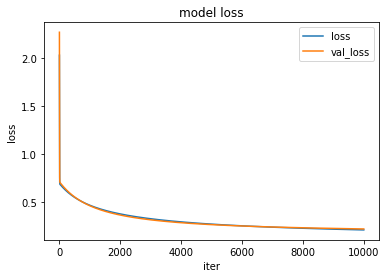


accuracy = 0.95
precision = 0.95
recall = 0.9545454545454546
f1 = 0.949874686716792
[[10  1]
 [ 0  9]]


In [6]:
scratch_logistic = ScratchLogisticRegression(num_iter=10000, lr=0.05, no_bias=False, verbose=True, regularization=0.1)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = scratch_train_test_split(iris_X, iris_y)
scratch_logistic.fit(iris_X_train, iris_y_train, iris_X_test, iris_y_test)
y_pred = scratch_logistic.predict(iris_X_test)
evalate(iris_y_test, y_pred)

In [7]:
logistic = LogisticRegression()
logistic.fit(iris_X_train, iris_y_train)
y_pred = logistic.predict(iris_X_test)
evalate(iris_y_test, y_pred)

accuracy = 0.9
precision = 0.9090909090909092
recall = 0.9090909090909092
f1 = 0.9
[[9 2]
 [0 9]]


### 【問題7】学習曲線のプロット
ScratchLogisticRegression クラスに learning_curve メソッドを追加し、 ScratchLogisticRegression クラスの fit メソッドに書き加えた。 実行は問題6で行った。グラフを見て損失が適切に下がっていることが確認できた。

### 【問題8】決定領域の可視化

In [8]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

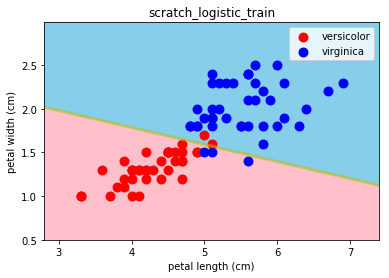

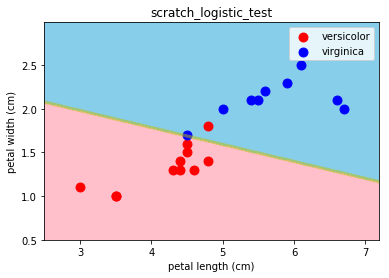

In [9]:
xlabel, ylabel = iris_feature_names

decision_region(iris_X_train, iris_y_train, scratch_logistic, title='scratch_logistic_train', xlabel=xlabel, ylabel=ylabel)
decision_region(iris_X_test, iris_y_test, scratch_logistic, title='scratch_logistic_test', xlabel=xlabel, ylabel=ylabel)

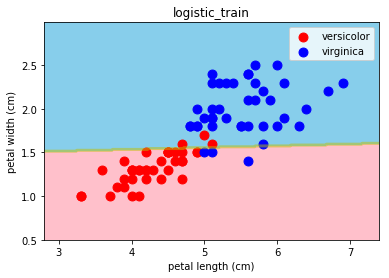

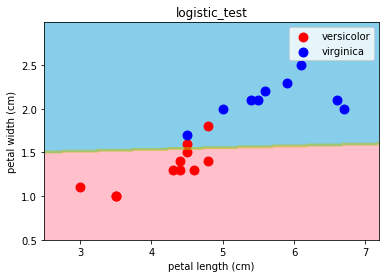

In [10]:
decision_region(iris_X_train, iris_y_train, logistic, title='logistic_train', xlabel=xlabel, ylabel=ylabel)
decision_region(iris_X_test, iris_y_test, logistic, title='logistic_test', xlabel=xlabel, ylabel=ylabel)